# 온라인 쇼핑몰 매출관계 분석
- 국가통계포털 https://kosis.kr/search/search.do
- 온라인쇼핑몰 판매매체별 / 상품군별거래액
- 합계등을 제외하고 선택(전기전자통신 2020년전후로 분리되어서 미리 합침)
- 행렬을 전환<br>
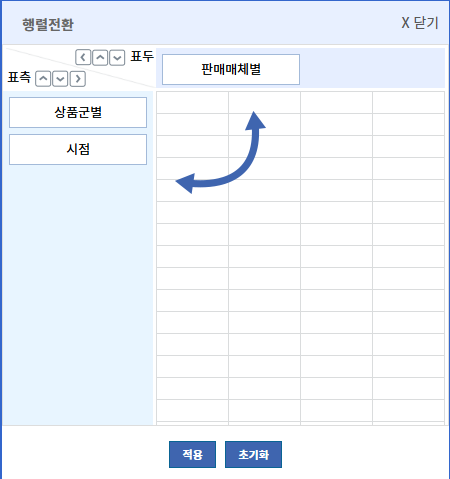

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.dates as mdates

import pandas as pd
from datetime import datetime

In [2]:
#font 설정 D2coding
d2_path ="./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2coding"

In [4]:
file_path="./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-kr") # 리룩스때는 에러가 뜰것 uft-8
ori.columns = ["category","date", "internet", "mobile"]
ori.tail()


,category,date,internet,mobile
2203,문화 및 레저서비스,2024.12,82688,117604
2204,이쿠폰서비스,2024.12,69173,504346
2205,음식서비스,2024.12,34997,2808932
2206,기타서비스,2024.12,212747,194445
2207,기타,2024.12,75613,144134


In [12]:
print("수정전")
print(ori['date'].tail())
# ori['date']=ori['date'].map(lambda x: x.strip(' p)'))
print("수정후")
print(ori['date'].tail())
ori

수정전
2203    2024.12
2204    2024.12
2205    2024.12
2206    2024.12
2207    2024.12
Name: date, dtype: float64
수정후
2203    2024.12
2204    2024.12
2205    2024.12
2206    2024.12
2207    2024.12
Name: date, dtype: float64


,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,가전·전자·통신기기,2017.01,307496,294626
2,서적,2017.01,103851,47379
3,사무·문구,2017.01,37233,15959
4,의복,2017.01,397422,467093
...,...,...,...,...
2203,문화 및 레저서비스,2024.12,82688,117604
2204,이쿠폰서비스,2024.12,69173,504346
2205,음식서비스,2024.12,34997,2808932
2206,기타서비스,2024.12,212747,194445


In [15]:
ori['date'] =pd.to_datetime(ori["date"],format='%Y.%m')
ori.dtypes
ori.head()

ValueError: time data "2017" doesn't match format "%Y.%m", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '음식서비스'] #  서적, 컴퓨터 및 주변기기, 사무·문구, 가방, 신발, 화장품, 애완용품, 여행
obj =['컴퓨터 및 주변기기','농축수산물','의복','신발','가방','음식서비스','음·식료품','애완용품','여행 및 교통서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(20)

,category,date,internet,mobile
2013,농축수산물,2024.04,239240,753076
326,의복,2018.03,482845,680287
1902,애완용품,2023.11,39185,179635
2012,음·식료품,2024.04,634821,2135330
81,농축수산물,2017.04,65812,110327
1913,의복,2023.12,517533,1505334
2120,의복,2024.09,411669,1116919
1800,가방,2023.07,64785,174718
327,신발,2018.03,56004,113113
816,음·식료품,2019.12,376396,840785


<function matplotlib.pyplot.show(close=None, block=None)>

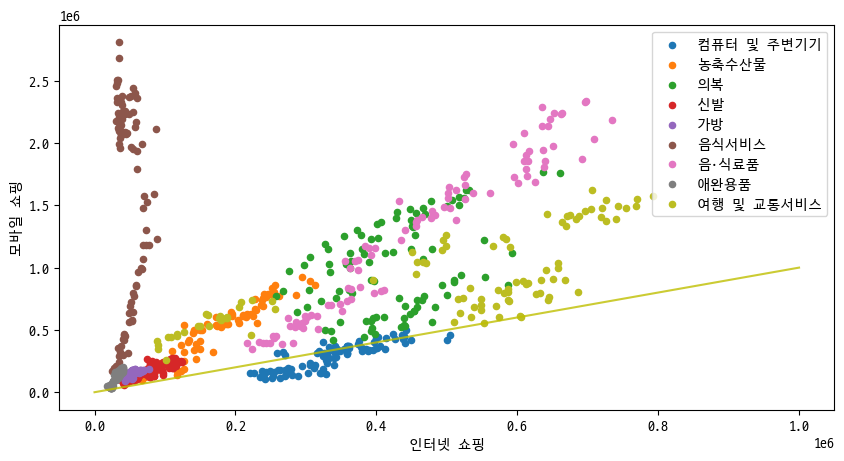

In [124]:
fig, ax =plt.subplots(figsize=(10,5))

category =obj

for cate in obj: 
    category_data =  ex1_data[ex1_data['category']==cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data, y_data, s=20, label=cate )
    
ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc='best')

ax.plot([0,1000000],[0,1000000], 'y-', alpha=0.8)
plt.show
# print(categroy_data,x_data,y_data)